<a href="https://colab.research.google.com/github/jltymony/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Iris_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What problem are we trying to solve?



We are using attributes of flowers to predict the species of a flower.




##Setting up the environment

In [ ]:
#Standard imports
import os

#3rd party import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
#local imports

LOAD DATA

Loading the Iris flower dataset using scikit-learn datasets

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Used to delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Used to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# to display basic info about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to distply number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##Preprocessing the dataset

In [ ]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

<Axes: >

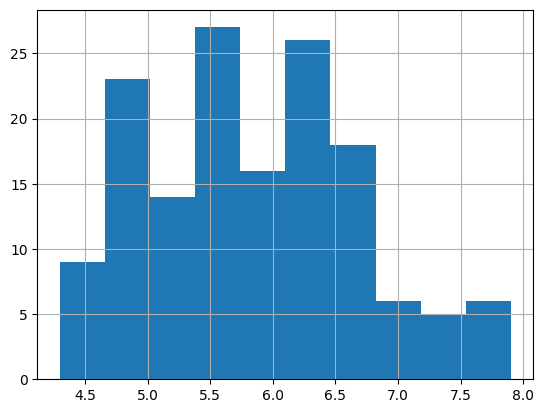

In [ ]:
# Displaying basic graphs in Histograms
df['SepalLengthCm'].hist()

<Axes: >

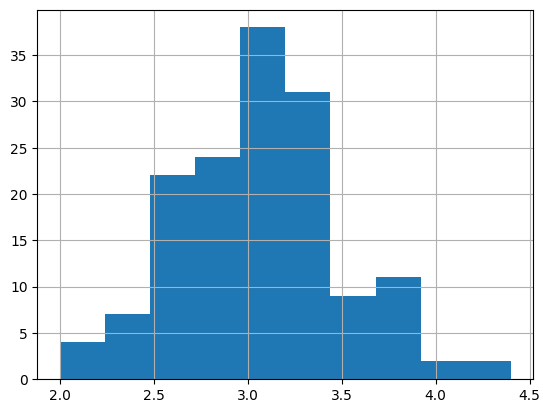

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

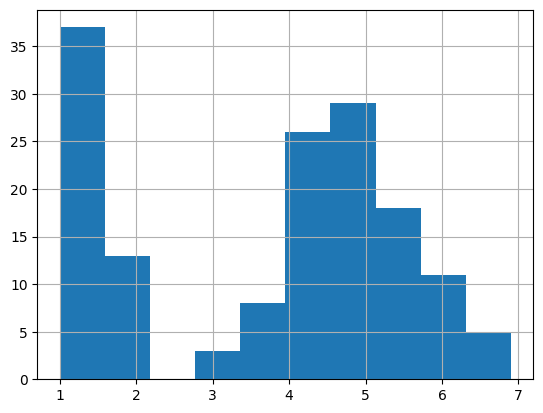

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

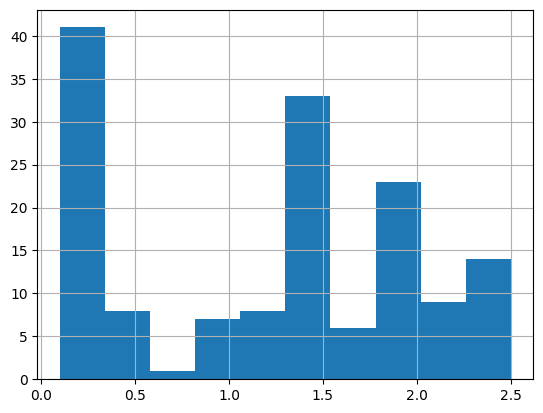

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
# scatterplot
colors = ['red', 'yellow', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

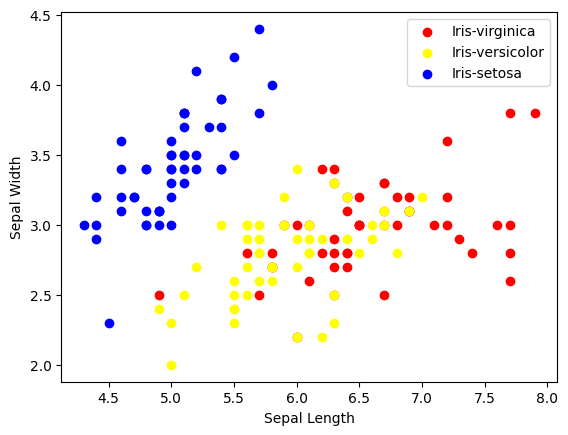

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

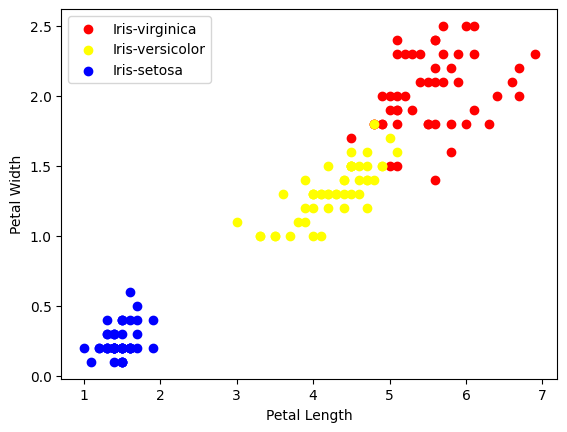

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

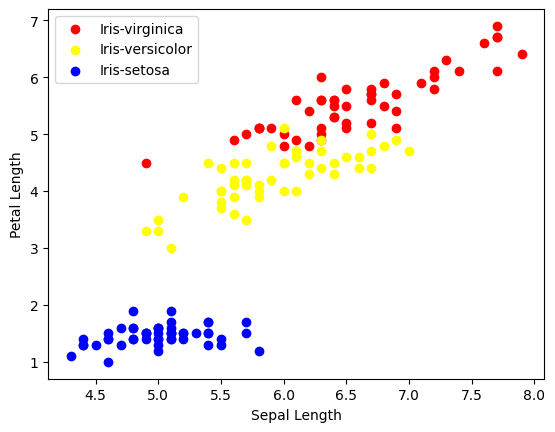

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

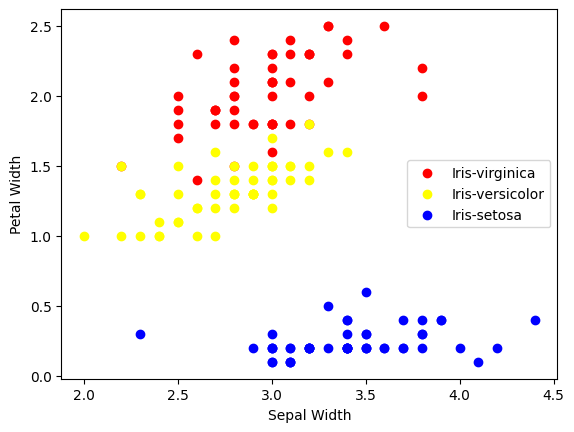

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Coorelation Matrix

> A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship. It’s most commonly used in building regression models.  If 2 variables have high correlation, we can neglect one variable from those two.  Internet accessed 5/31/2023. 



In [ ]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

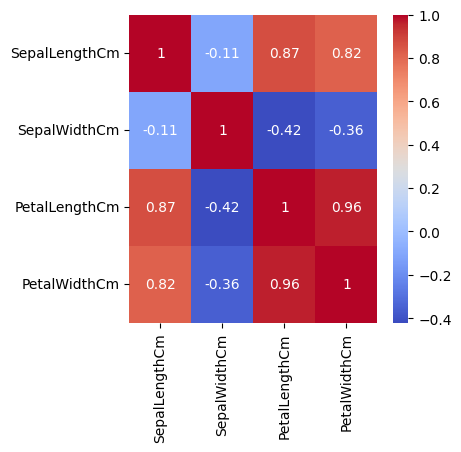

In [ ]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True, ax=ax, cmap= 'coolwarm')

## Label Encoder

> Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. Ex. below changed Species from a String to Numerical data.  Internet accessed 5/31/2023.



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##Model Training

In [ ]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

###Logistic Regression
> This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. https://www.ibm.com/topics/logistic-regression#:~:text=Related%20solutions-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables. Accessed 5/31/2023



In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  100.0


###K-Nearest Neighbors
> The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another. https://www.ibm.com/topics/knn accessed 5/31/2023,



In [ ]:
#knn -> K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


###Decision Tree
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
https://www.ibm.com/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes.  Accessed 5/31/2023

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
